# Final Project ML Regression | Insurance Charges Prediction

In [209]:
import numpy  as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
from scipy import stats, special

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Outline: 

1. Processing 
2. Analytics 


# 1. Processing 
- **Shape**: The dataset is named `insurance.csv`. Firstly, call `insurance.csv` as `df`. There is 1338 rows, 7 columns including:
    - age
    - sex
    - bmi
    - children
    - smoker
    - region
    - charges
    
- **Data types**: There are 3 `object`, 2 `float64` and 2 `int64`
    - age:         int64
    - sex:        object
    - bmi:         float64
    - children:      int64
    - smoker:        object
    - region:        object
    - charges:       float64
- **Missing data**: There is no missing data
- **Duplication**: There is duplication. After few codes, it is easy to determine the index of row are 195 and 581. Then drop duplication and save it as `df2` 
- **Checking statistical**: 
    - For `charges` feature, it got right_skewd behavior, got many outliers, it can be said smoker got higher charges than non-smoker
    - For `age` feature, it seem to be uniform accept 18,19 and no outliers
    - For `bmi` feature, got Gaussian distribution but got many outliers
    - For `smoker` feature, number of non-smoker is higher than smoker

In [28]:
# Shape 
df.shape

(1338, 7)

In [75]:
# Datatype 
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [48]:
df.dtypes.value_counts()

object     3
float64    2
int64      2
dtype: int64

In [31]:
# Missing data or not 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
# Duplication or not 
df.duplicated().value_counts()

False    1337
True        1
dtype: int64

In [43]:
# Show duplicated row and delete
df[df.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [3]:
# Drop duplicated row and save it as "df2"
df2 = df.drop_duplicates(keep = 'last')

In [51]:
# Stats - numeric
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [69]:
df2['age'].dtypes

dtype('int64')

In [4]:
float_cols = [ col for col in df2.columns if df2[col].dtypes == 'float64']
int64_cols = [ col for col in df2.columns if df2[col].dtypes == 'int64']
numerics_cols = float_cols + int64_cols
numerics_cols

['bmi', 'charges', 'age', 'children']

In [5]:
# stat - ordinary
df2['region'].value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

In [6]:
ordinary_cols = [col for col in df2.columns if (len(df2[col].unique()) > 2 ) and
                 (df2[col].dtypes == 'object')]
ordinary_cols

['region']

In [7]:
# stat - binary
df2['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [8]:
binary_cols = [col for col in df2.columns if (len(df2[col].unique()) == 2 ) and
                 (df2[col].dtypes == 'object')]
binary_cols

['sex', 'smoker']

In [9]:
cate_cols = ordinary_cols + binary_cols
cate_cols

['region', 'sex', 'smoker']

In [139]:
corr = df2[numerics_cols].corr()
corr

,bmi,charges,age,children
bmi,1.000000,0.198401,0.109344,0.012755
charges,0.198401,1.000000,0.298308,0.067389
age,0.109344,0.298308,1.000000,0.041536
children,0.012755,0.067389,0.041536,1.000000


# Plotting 


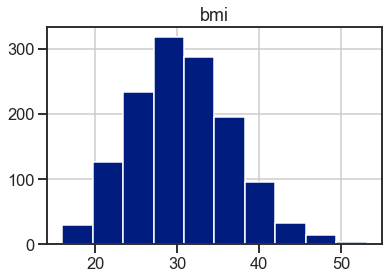

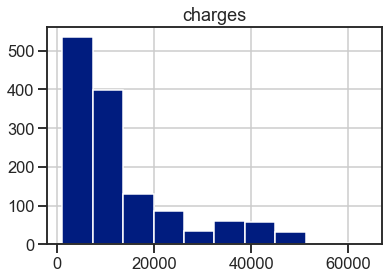

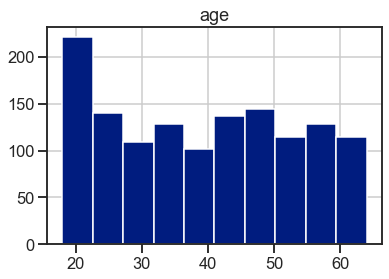

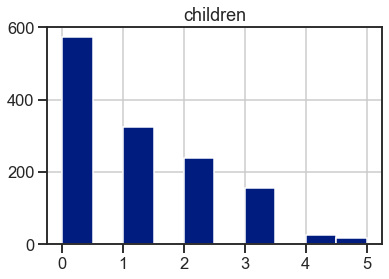

In [160]:
for col in numerics_cols: 
    df2.hist(col)

<AxesSubplot:xlabel='age'>

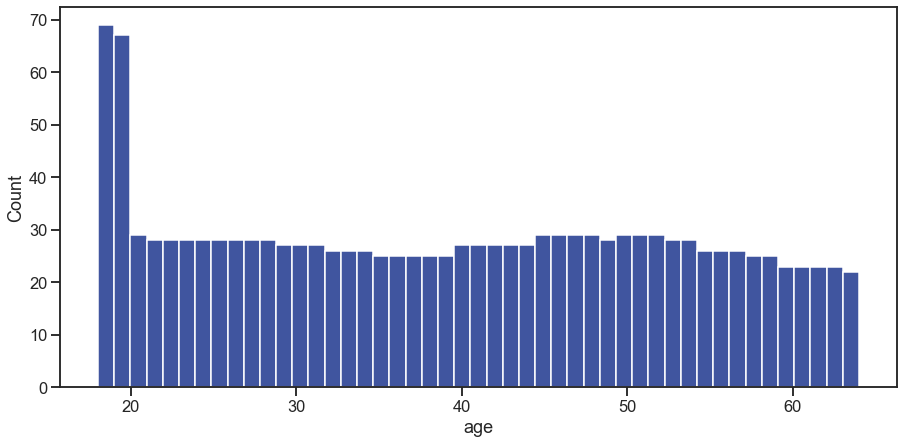

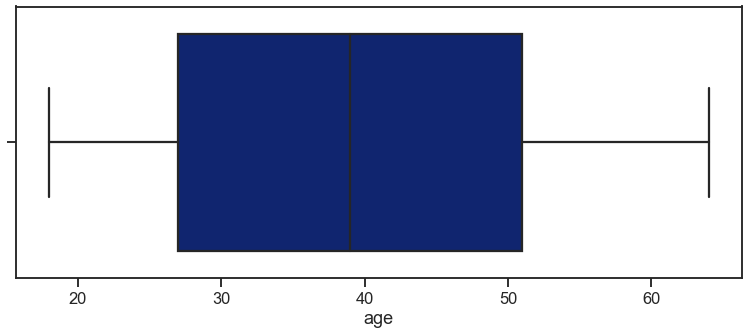

In [164]:
# Visualize age column
plt.figure(figsize=(15,7))
sns.histplot(data=df2, x='age', bins=47)

# Visualize age witha boxplot.
plt.figure(figsize=(13,5))
sns.boxplot(x=df2.age)

<AxesSubplot:xlabel='bmi'>

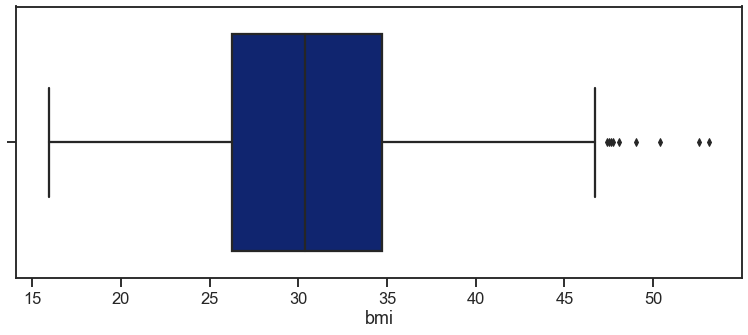

In [165]:
# Visualize age witha boxplot.
plt.figure(figsize=(13,5))
sns.boxplot(x=df2.bmi)

<AxesSubplot:xlabel='charges'>

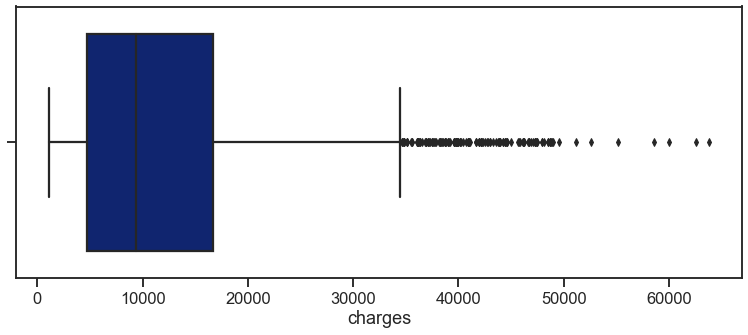

In [167]:
# Visualize expenses witha boxplot.
plt.figure(figsize=(13,5))
sns.boxplot(x=df2.charges)

<AxesSubplot:xlabel='charges', ylabel='Count'>

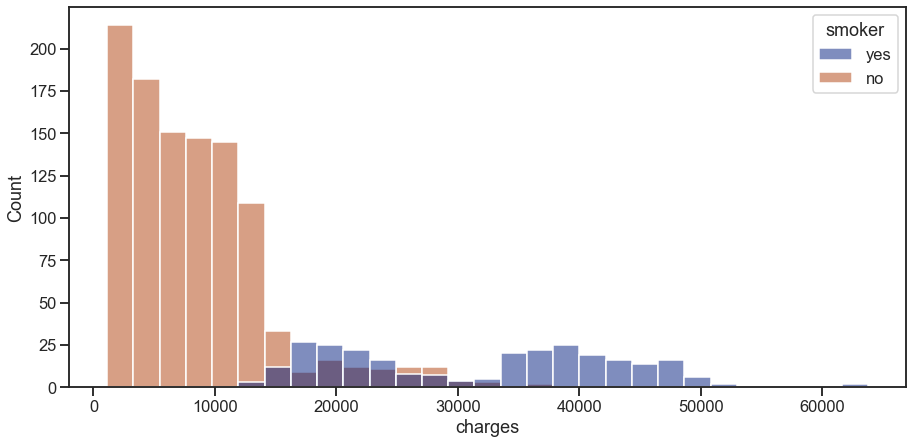

In [168]:
# Visualize by adding the smoker variable in.
# Visualize our expenses column.
plt.figure(figsize=(15,7))
sns.histplot(data=df2, x='charges', hue='smoker')

# 2. Analytics 


In [171]:
#df3 is copy of df2 for test(new)

df3 = df2.copy()
cate_cols 

['region', 'sex', 'smoker']

In [172]:
for col in cate_cols:
    df3[col] = le.fit_transform(df3[col])

In [173]:
df3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [174]:
df3.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [175]:
df3.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


In [178]:
#D’Agostino’s K-squared test
ts, p =  stats.normaltest(df3['charges'])
if p < 0.05:
    print('The null hypothesis is rejected -> Not Normal, p = ', p)
else :
    print('The null hypothesis can not be rejected -> Normal, p = ', p)

The null hypothesis is rejected -> Not Normal, p =  8.762608303862979e-74


In [183]:
df4 = data_ohc.copy()
df4.head()

,age,bmi,children,charges,region_0,region_1,region_2,region_3,smoker_0,smoker_1,sex_0,sex_1
0,19,27.900,0,16884.92400,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,18,33.770,1,1725.55230,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,28,33.000,3,4449.46200,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [191]:
y_col = 'charges'
feature_cols = [x for x in df4.columns if x != y_col]

X_data_ohc = df4[feature_cols]
y_data_ohc = df4[y_col]

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_data_ohc,y_data_ohc , test_size = 0.3 )


In [200]:
y_train_bc= stats.boxcox(y_train)[0]
lamda = stats.boxcox(y_train)[1]


lamda

0.025421798003387088

In [197]:
lr = lr.fit(X_train, y_train_bc)
y_pred = lr.predict(X_test)

In [204]:
from scipy.special import boxcox, inv_boxcox
y_pred[:10]

array([11.26391461, 10.66280398,  9.7982079 ,  9.94691564,  9.37358109,
       10.05217156,  8.72682624,  9.70293187,  9.97026546,  9.37787992])

In [214]:
y_pred_back = special.inv_boxcox(y_pred, lamda)
r2_score(y_test, y_pred_back)

0.5094010667909461

<AxesSubplot:>

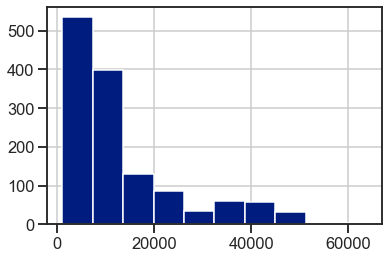

In [217]:
# Solutions
df4.charges.hist()

In [218]:
# applying D'Agostino K^2 test to check the normality! 
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(df4.charges.values)

NormaltestResult(statistic=336.4416065386955, pvalue=8.762608303862979e-74)

NormaltestResult(statistic=112.40691545330931, pvalue=3.900752948411608e-25)

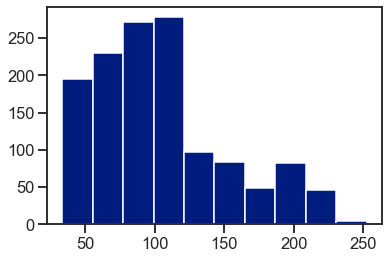

In [219]:
### 1- Square root
# applying log transform on chareges feature: 
sqrt_charges = np.sqrt(df4.charges)
plt.hist(sqrt_charges)

# applying D'Agostino K^2 test to check the normality!  
sqrt_test_res = normaltest(sqrt_charges.values)
sqrt_test_res

NormaltestResult(statistic=52.147628145443655, pvalue=4.745548606594116e-12)

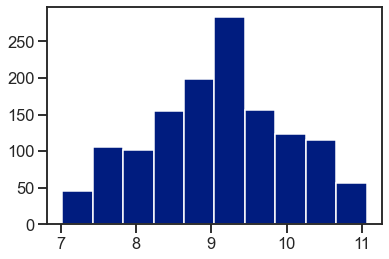

In [221]:
### 2- Log Transformation
# applying log transform on chareges feature: 
log_charges = np.log(df4.charges)
plt.hist(log_charges)

# applying D'Agostino K^2 test to check the normality! 
log_test_res = normaltest(log_charges.values)
log_test_res

NormaltestResult(statistic=53.89147995320808, pvalue=1.984329630216316e-12)

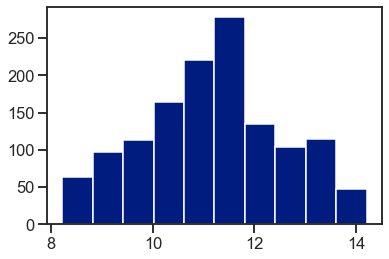

In [242]:
### Box-cox
# applying box cox transform on chareges feature: 
plt.hist(boxcox_medv)
boxcox_test_res= normaltest(boxcox_medv)
boxcox_test_res

In [227]:
normaltest(boxcox_medv)

NormaltestResult(statistic=53.89147995320808, pvalue=1.984329630216316e-12)

/Users/nguyenthientoan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

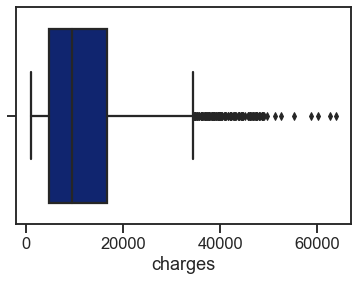

In [232]:
sns.boxplot(df4.charges)# neeed detect outlier and try to drop outlier

In [243]:
d = {'Transormation': ['Square-Root', 'Log', 'Box Cox' ], 'P-value': [sqrt_test_res[1], log_test_res[1], boxcox_test_res[1]]}
df_results = pd.DataFrame(data=d)
df_results

,Transormation,P-value
0,Square-Root,3.900753e-25
1,Log,4.745549e-12
2,Box Cox,1.984330e-12


# Determining Normality

# 3. Modelling
- **One Hot Encoder**: 
- **Train test split**:
- **Linear Regression**

In [34]:
y_col = 'charges'
# Split the data that is one-hot encoded
feature_cols = [x for x in df2.columns if x != y_col]
X_data = df2[feature_cols]
y_data = df2[y_col]

print('X columns:', feature_cols)
print('y columns:', y_col)

X columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
y columns: charges


In [88]:
# Copy of the data
data_ohc = df2.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()


In [45]:
# Determine how many extra columns would be created
num_ohc_cols = (data_ohc[cate_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))
num_ohc_cols

region    4
smoker    2
sex       2
dtype: int64

In [86]:
# Integer encode the string categories
dat = le.fit_transform(data_ohc['region']).astype(np.int)
    
# Remove the original column from the dataframe
data_ohc = data_ohc.drop('region', axis=1)

# One hot encode the data--this returns a sparse array
new_dat = ohc.fit_transform(dat.reshape(-1,1))

# Create unique column names
n_cols = new_dat.shape[1]
col_names = ['_'.join(['region', str(x)]) for x in range(n_cols)]

# Create the new dataframe
new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
data_ohc = pd.concat([data_ohc, new_df], axis=1)

<ipython-input-86-3f8d477b2e17>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dat = le.fit_transform(data_ohc['region']).astype(np.int)


In [89]:
for col in num_ohc_cols.index:
    # Integer encode the string categories
    dat =  le.fit_transform(data_ohc[col]).astype(np.int64)
    ## Remove the original column from the dataframe 
    data_ohc = data_ohc.drop(col , axis = 1)
    # One hot encode the data--this returns a sparse array
    new_data = ohc.fit_transform(dat.reshape(-1,1))
    # Create unique column names
    number_cols = new_data.shape[1]
    name_cols = ['_'.join([col,str(x)]) for x in range(number_cols)]
    # create new df
    new_dataframe = pd.DataFrame(new_data.toarray(),
                                 index=data_ohc.index, 
                                 columns = name_cols )
    #concat 
    data_ohc = pd.concat([data_ohc,new_dataframe], axis = 1)
    

In [90]:
data_ohc

,age,bmi,children,charges,region_0,region_1,region_2,region_3,smoker_0,smoker_1,sex_0,sex_1
0,19,27.900,0,16884.92400,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,18,33.770,1,1725.55230,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,28,33.000,3,4449.46200,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1334,18,31.920,0,2205.98080,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1335,18,36.850,0,1629.83350,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [91]:
y_col = 'charges'

# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

In [111]:
X_train,X_test, y_train,y_test  = train_test_split(X_data_ohc, y_data_ohc , test_size = 0.2)

In [112]:
lr = LinearRegression()

In [113]:
lr.fit(X_train,y_train)

LinearRegression()

In [114]:
y_pred = lr.predict(X_test)

In [116]:
r2_score(y_test, y_pred)

0.7413280829371363

In [119]:
mean_squared_error(y_test, y_pred)

36338622.106054805

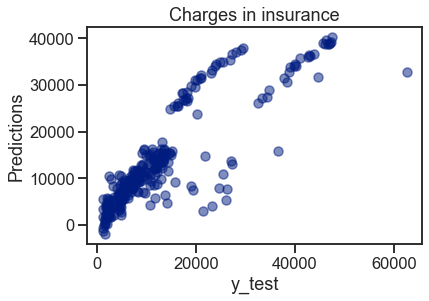

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='y_test', 
       ylabel='Predictions',
       title='Charges in insurance');

In [ ]:
# solution

# Applying Various Regression Models

In [244]:
# Importing Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [253]:
insurance_data = df3.copy()

# Select the object (string) columns
mask = insurance_data.dtypes == np.object
categorical_cols = insurance_data.columns[mask]

# convert categorical data into numerical data
le = LabelEncoder()
for category in categorical_cols:
    le.fit(insurance_data[category].drop_duplicates())
    insurance_data[category] = le.transform(insurance_data[category])

X = insurance_data.drop(columns = 'charges', axis=1)
y = insurance_data.charges

pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pf, y, 
                                                    test_size=0.3, random_state=42)

<ipython-input-253-3bf92d2a4e89>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = insurance_data.dtypes == np.object


# Applying various linear regression models with advanced techniqeus

Through the following steps:

- Chain multiple data processing steps together using Pipeline
- Use the KFolds object to split data into multiple folds.
- Perform cross validation using SciKit Learn with cross_val_predict and GridSearchCV

In [257]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [258]:
# Data Retrieving 
insurance_data = pd.read_csv('Data/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [259]:
# Select the object (string) columns
mask = insurance_data.dtypes == np.object
categorical_cols = insurance_data.columns[mask]

le = LabelEncoder()
for category in categorical_cols:
    le.fit(insurance_data[category].drop_duplicates())
    insurance_data[category] = le.transform(insurance_data[category])

<ipython-input-259-2a46e51f21e7>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = insurance_data.dtypes == np.object


In [260]:
X = insurance_data.drop(columns = 'charges', axis=1)
y = insurance_data.charges

In [261]:
kf = KFold(shuffle = True,n_splits =3, random_state = 42 )

# 1- Vanilla Linear Regression

In [291]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("linear_regression", LinearRegression())])

params = {"polynomial_features__degree": range(3)}

estimator.fit(X_train,y_train)
grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

(0.8412337004892089, {'polynomial_features__degree': 2})

In [287]:
best_vanilla_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("vanilla_regression", LinearRegression())])

best_vanilla_estimator.fit(X, y)
best_vanilla_estimator.score(X, y)

0.8466374578355711

In [297]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))
linearRegression_R2 = r2_score(y_test, linearRegression.predict(X_test)) 
print(linearRegression_rmse)
print(linearRegression_R2)

5149.5567497600905
0.8429972521414144


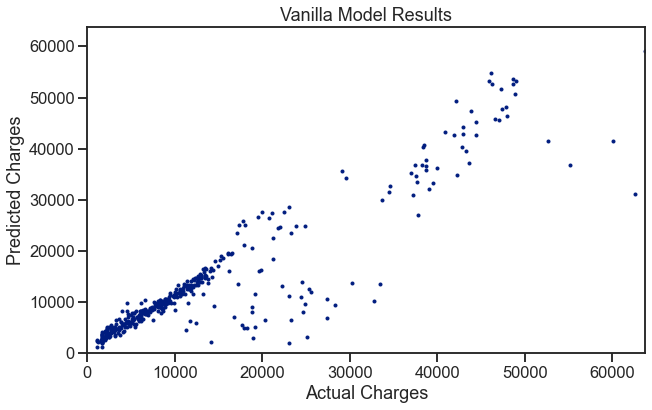

In [298]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Charges', 
       ylabel='Predicted Charges', 
       xlim=lim,
       ylim=lim,
       title='Vanilla Model Results');

# 2- Lasso Regression

In [292]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    "polynomial_features__degree": [1, 2, 3],
    "lasso_regression__alpha": np.geomspace(0.01, 30, 50)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

/Users/nguyenthientoan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.309e+09, tolerance: 1.297e+07
  model = cd_fast.enet_coordinate_descent(
/Users/nguyenthientoan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.594e+09, tolerance: 1.289e+07
  model = cd_fast.enet_coordinate_descent(
/Users/nguyenthientoan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

(0.8417503849955549,
 {'lasso_regression__alpha': 30.0, 'polynomial_features__degree': 2})

In [293]:
best_lasso_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.85))])

best_lasso_estimator.fit(X, y)
best_lasso_estimator.score(X, y)

0.8466373113738338

In [299]:
from sklearn.linear_model import LassoCV
alphas = np.geomspace(0.1, 400, 1000)
lassoCV = LassoCV(alphas=alphas,
                  max_iter=10000,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))
lassoCV_R2 = r2_score(y_test, lassoCV.predict(X_test)) 

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower
print(lassoCV_R2)
13.7454744402372 

9.779743010357421 5142.97002316443
0.8433986353484728


13.7454744402372

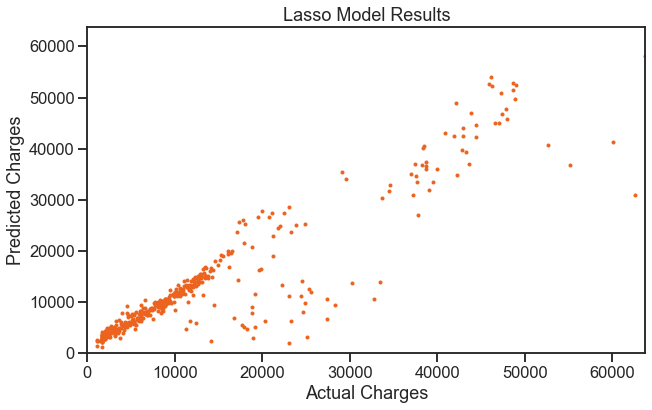

In [300]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, lassoCV.predict(X_test), 
         marker='o', ls='', color='#eb631e', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Charges', 
       ylabel='Predicted Charges', 
       xlim=lim,
       ylim=lim,
       title='Lasso Model Results');

# 3- Ridge Regression

In [294]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    "polynomial_features__degree": [1, 2, 3],
    "ridge_regression__alpha": np.geomspace(2, 30, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

(0.841391615488992,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 19.562422522941418})

In [295]:
best_ridge_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=19.56))])

best_ridge_estimator.fit(X, y)
best_ridge_estimator.score(X, y)

/Users/nguyenthientoan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.579e+07, tolerance: 1.961e+07
  model = cd_fast.enet_coordinate_descent(


0.8465602066983138

In [301]:
from sklearn.linear_model import RidgeCV

alphas = np.geomspace(0.01, 20, 1000).tolist()
ridgeCV = RidgeCV(alphas=alphas, cv=3).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))
ridgeCV_R2 = r2_score(y_test, ridgeCV.predict(X_test)) 

print(ridgeCV.alpha_, ridgeCV_rmse)
print(ridgeCV_R2)

0.01 5149.456795802107
0.8430033469936601


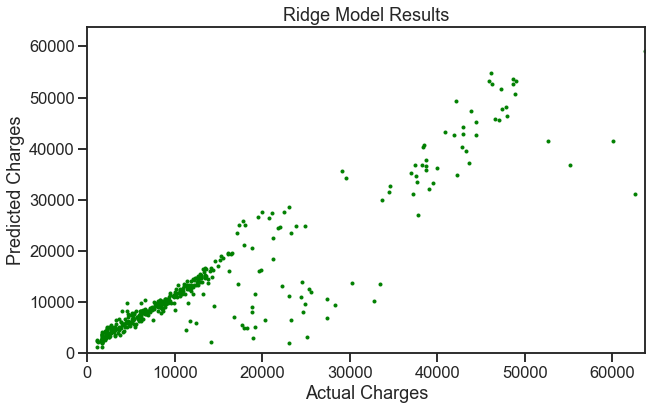

In [302]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, ridgeCV.predict(X_test), 
         marker='o', ls='', color='g', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Charges', 
       ylabel='Predicted Charges', 
       xlim=lim,
       ylim=lim,
       title='Ridge Model Results');

In [296]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

# 4- ElasticNetCV

In [305]:
from sklearn.linear_model import ElasticNetCV
alphas = np.geomspace(0.001, 1, 100)
l1_ratios = np.linspace(0.1, 0.9, 10)

elasticNetCV = ElasticNetCV(alphas=alphas, 
                            l1_ratio=l1_ratios,
                            max_iter=1000).fit(X_train, y_train)

elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))
elasticNetCV_R2 = r2_score(y_test, elasticNetCV.predict(X_test)) 

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)
print(ridgeCV_R2)

/Users/nguyenthientoan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10622290.462467194, tolerance: 10299491.67595318
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nguyenthientoan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17109432.856588364, tolerance: 10299491.67595318
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nguyenthientoan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34332918.14451218, tolerance: 10299491.67595318
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nguyenthientoan/opt

0.008111308307896872 0.9 5144.746338585897
0.8430033469936601


/Users/nguyenthientoan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62761404.327178955, tolerance: 10557720.926031781
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nguyenthientoan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129107082.67418861, tolerance: 10557720.926031781
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nguyenthientoan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237563760.37141037, tolerance: 10557720.926031781
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nguyenthientoan

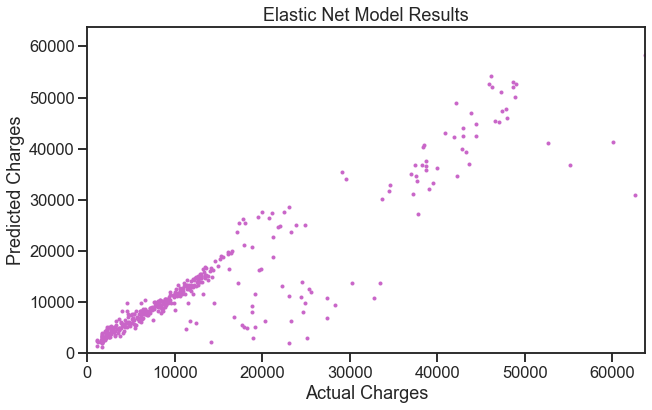

In [306]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, elasticNetCV.predict(X_test), 
         marker='o', ls='', color='#c965c8', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Charges', 
       ylabel='Predicted Charges', 
       xlim=lim,
       ylim=lim,
       title='Elastic Net Model Results');

In [307]:
rmse_vals = [linearRegression_rmse, lassoCV_rmse, ridgeCV_rmse, elasticNetCV_rmse]
R2_vals = [linearRegression_R2, lassoCV_R2, ridgeCV_R2, elasticNetCV_R2] 

labels = ['Linear', 'Lasso', 'Ridge', 'ElasticNet']
metric_df = pd.Series(rmse_vals, index=labels).to_frame()
metric_df.rename(columns={0: 'RMSE'}, inplace=1)
metric_df['R2'] = R2_vals
metric_df

,RMSE,R2
Linear,5149.556750,0.842997
Lasso,5142.970023,0.843399
Ridge,5149.456796,0.843003
ElasticNet,5144.746339,0.843290


In [308]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l1',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'none',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
new_R2 = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))
    new_R2[modellabel] = r2_score(y_test, SGD.predict(X_test))
    
metric_df['RMSE-SGD'] = pd.Series(new_rmses)
metric_df['R2-SGD'] = pd.Series(new_R2)
metric_df

,RMSE,R2,RMSE-SGD,R2-SGD
Linear,5149.556750,0.842997,7.470306e+15,-3.304033e+23
Lasso,5142.970023,0.843399,8.868451e+14,-4.656538e+21
Ridge,5149.456796,0.843003,1.242131e+15,-9.134862e+21
ElasticNet,5144.746339,0.843290,5.170833e+14,-1.583028e+21
